In [1]:
library(nlme)
library(ggplot2)
library(gridExtra)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [29]:
# Reading the csv file with abundance of important taxa 
data<-read.csv("LME_akkermansia.csv",check.names=FALSE)
data

Subject,Abund,Time,Treat,Individual,OTU_name
<fct>,<dbl>,<int>,<fct>,<int>,<fct>
340.T1,0.034491648,1,Placebo,1,Lactobacillus
341.T1,0.020603714,1,Placebo,2,Lactobacillus
342.T1,0.047921199,1,Placebo,3,Lactobacillus
344.T1,0.006732518,1,Placebo,4,Lactobacillus
345.T1,0.006213812,1,Placebo,5,Lactobacillus
347.T1,0.314171447,1,Placebo,6,Lactobacillus
348.T1,0.307222222,1,Placebo,7,Lactobacillus
349.T1,0.312462068,1,Placebo,8,Lactobacillus
351.T1,0.010054521,1,Letrozole,9,Lactobacillus


In [30]:
mylist <- split(data, data$OTU_name)

## Lactobacillus

Linear mixed-effects model fit by REML
 Data: mylist$Lactobacillus 
       AIC      BIC    logLik
  724.8005 743.4464 -354.4003

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             18.72018 (Intr)
1 | I((Time - 3)^2)TRUE 18.76383 -0.858
Residual                21.45191       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  43.86429  6.360100 62  6.896791  0.0000
I((Time - 3)^2)              -0.48214  2.027015 62 -0.237859  0.8128
TreatPlacebo                 -3.13929  8.994540 14 -0.349021  0.7323
I((Time - 3)^2):TreatPlacebo -0.83036  2.866631 62 -0.289663  0.7730
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.637                   
TreatPlacebo                 -0.707  0.451            
I((

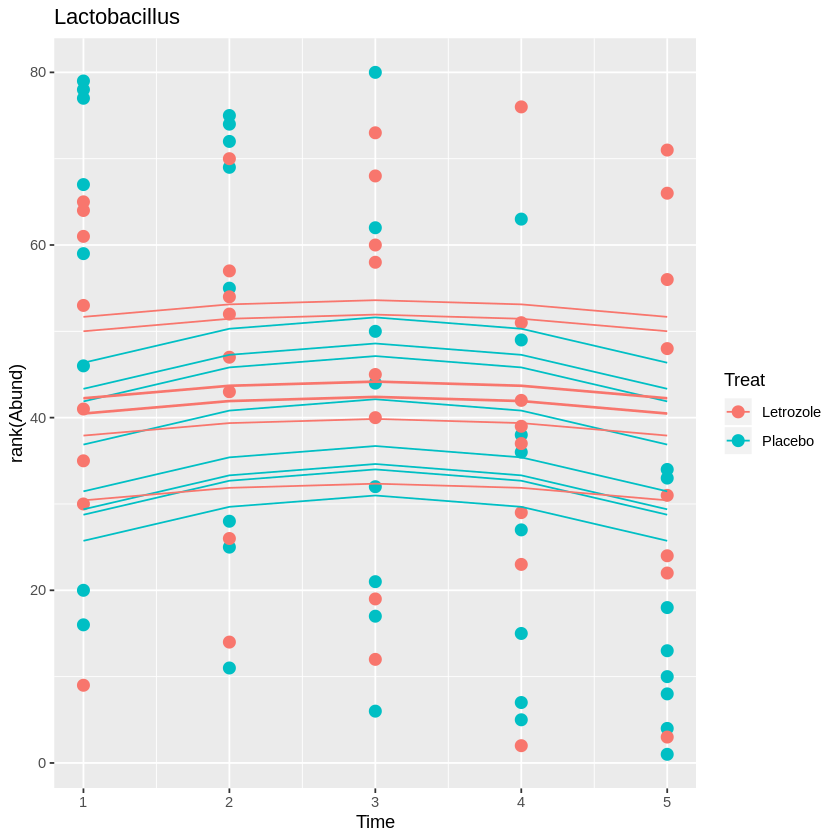

In [9]:
fm_akker <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lactobacillus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Lactobacillus),
                      Time=c(min(mylist$Lactobacillus$Time),
                            max(mylist$Lactobacillus$Time)))


    p_akker <- ggplot(mylist$Lactobacillus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lactobacillus") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)

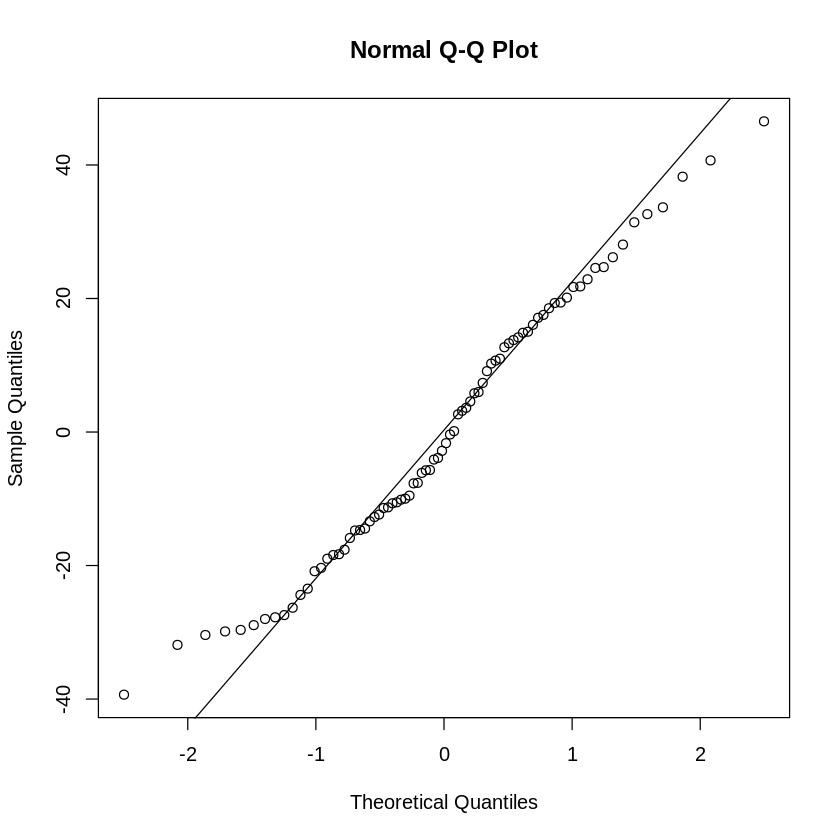

In [10]:
qqnorm(resid(fm_akker))
qqline(resid(fm_akker))

## Bifidobacterium

Linear mixed-effects model fit by REML
 Data: mylist$Bifidobacterium 
       AIC      BIC    logLik
  680.9498 699.5956 -332.4749

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev    Corr  
(Intercept)              9.768863 (Intr)
1 | I((Time - 3)^2)TRUE 10.453768 -0.943
Residual                16.899658       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   69.17500  4.343205 62 15.927177  0.0000
I((Time - 3)^2)               -8.37500  1.596868 62 -5.244643  0.0000
TreatPlacebo                 -35.02857  6.142220 14 -5.702917  0.0001
I((Time - 3)^2):TreatPlacebo   5.58929  2.258312 62  2.474984  0.0161
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.735                   
TreatPlacebo                 -0.707  0.520     

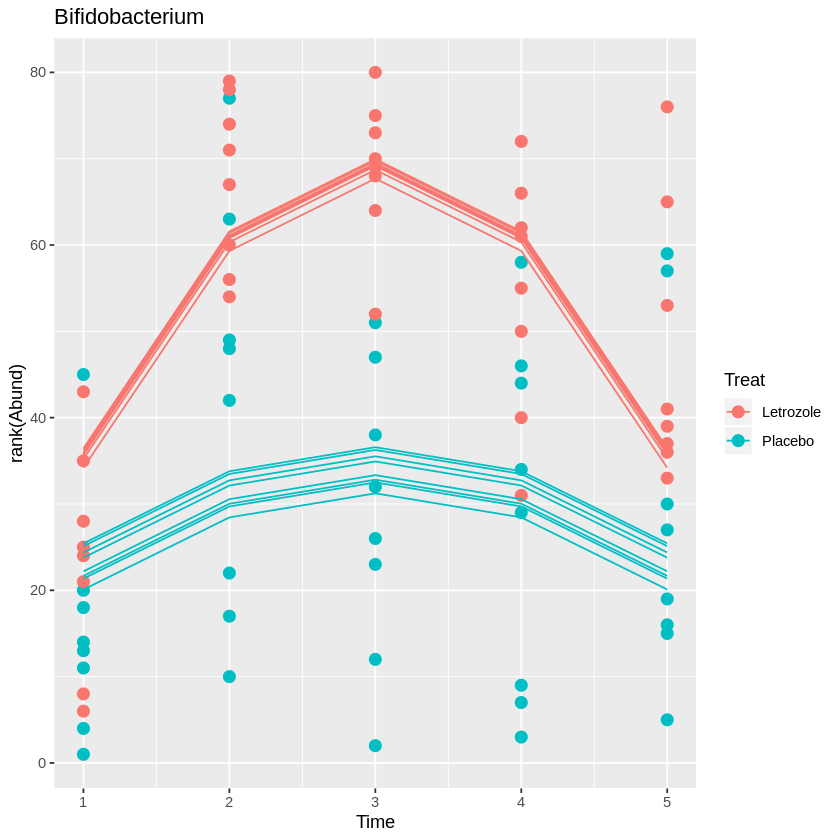

In [11]:
fm_bifido <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Bifidobacterium, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_bifido))
    newdat <- expand.grid(Treat=unique(mylist$Bifidobacterium),
                      Time=c(min(mylist$Bifidobacterium$Time),
                            max(mylist$Bifidobacterium$Time)))


    p_bifido <- ggplot(mylist$Bifidobacterium, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Bifidobacterium") +
          geom_line(aes(y=predict(fm_bifido), group=Individual))
    print(p_bifido)

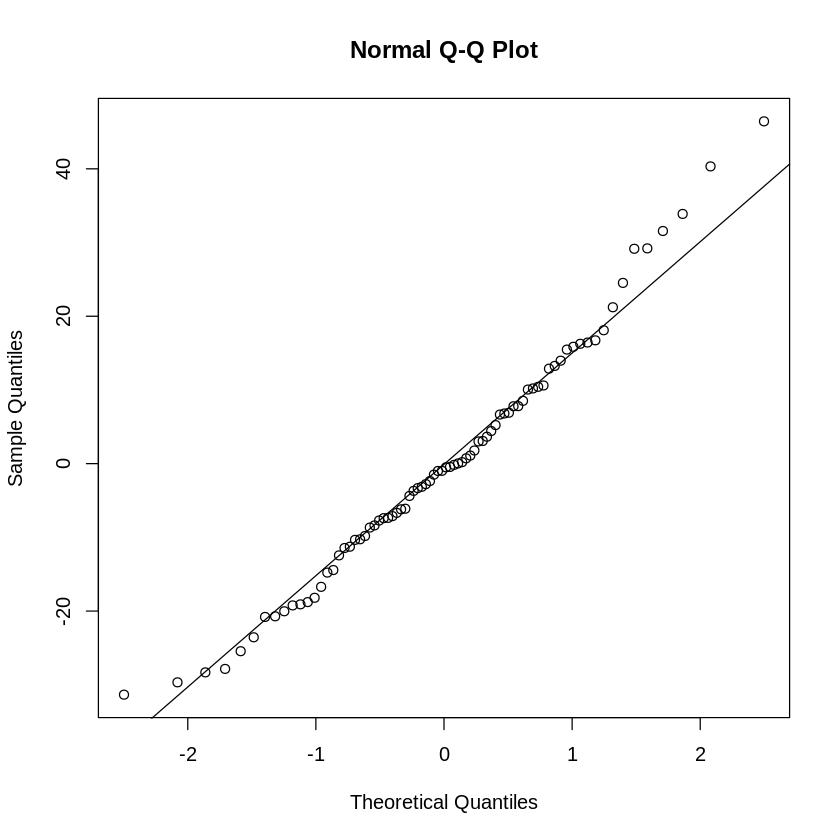

In [12]:
qqnorm(resid(fm_bifido))
qqline(resid(fm_bifido))

## Coprococcus

Linear mixed-effects model fit by REML
 Data: mylist$Coprococcus 
       AIC     BIC    logLik
  719.5691 738.215 -351.7846

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             18.05382 (Intr)
1 | I((Time - 3)^2)TRUE 18.05382 -0.765
Residual                20.11405       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF  t-value p-value
(Intercept)                  35.31071  6.609446 62 5.342462  0.0000
I((Time - 3)^2)               1.60714  1.900599 62 0.845598  0.4010
TreatPlacebo                  2.52143  9.347168 14 0.269753  0.7913
I((Time - 3)^2):TreatPlacebo  0.71429  2.687853 62 0.265746  0.7913
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.575                   
TreatPlacebo                 -0.707  0.407            
I((Time - 3)

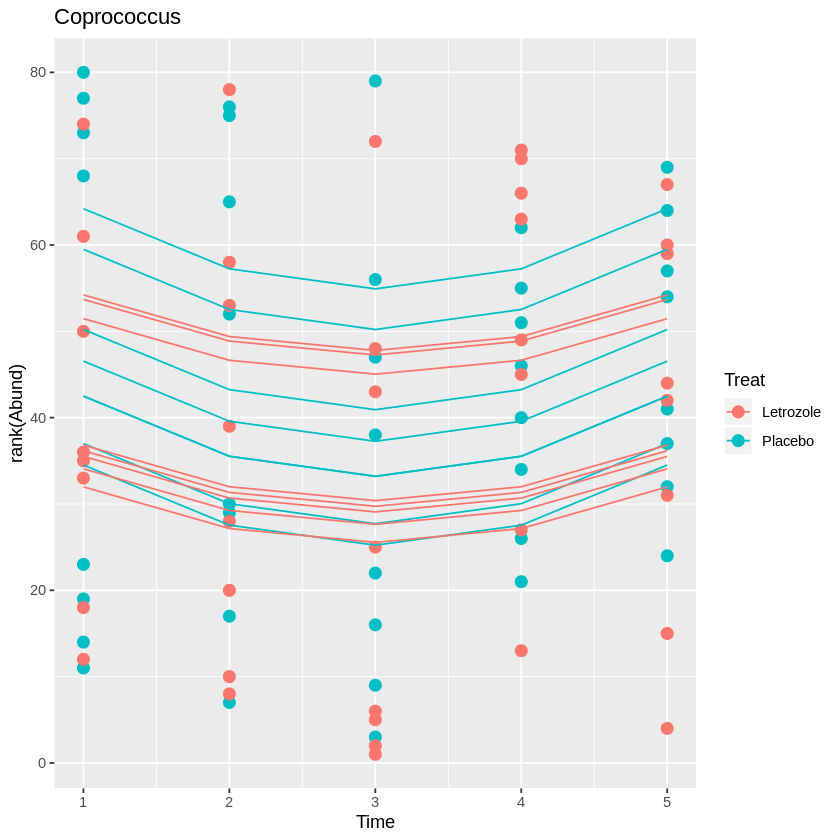

In [14]:
fm_copro <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Coprococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_copro))
    newdat <- expand.grid(Treat=unique(mylist$Coprococcus),
                      Time=c(min(mylist$Coprococcus$Time),
                            max(mylist$Coprococcus$Time)))


    p_copro <- ggplot(mylist$Coprococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Coprococcus") +
          geom_line(aes(y=predict(fm_copro), group=Individual))
    print(p_copro)

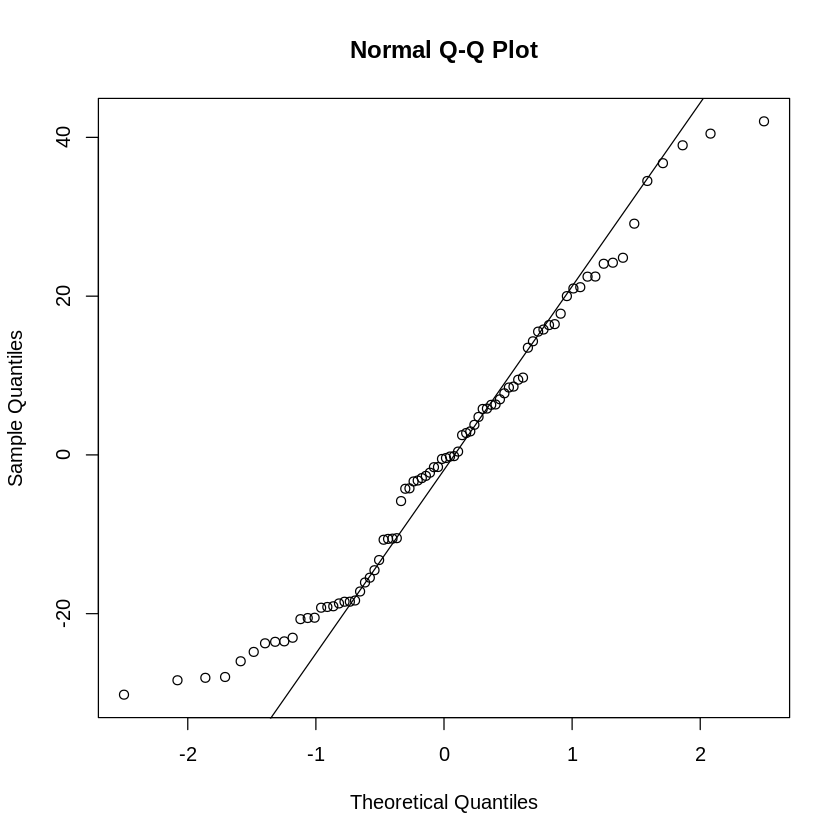

In [15]:
qqnorm(resid(fm_copro))
qqline(resid(fm_copro))

## Allobaculum

Linear mixed-effects model fit by REML
 Data: mylist$Allobaculum 
       AIC      BIC    logLik
  686.3063 704.9522 -335.1532

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             14.52578 (Intr)
1 | I((Time - 3)^2)TRUE 14.52578 -0.689
Residual                15.83020       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   66.09286  5.622580 62 11.754899  0.0000
I((Time - 3)^2)               -8.25893  1.495813 62 -5.521365  0.0000
TreatPlacebo                 -31.97143  7.951528 14 -4.020790  0.0013
I((Time - 3)^2):TreatPlacebo   6.91071  2.115399 62  3.266861  0.0018
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.532                   
TreatPlacebo                 -0.707  0.376            


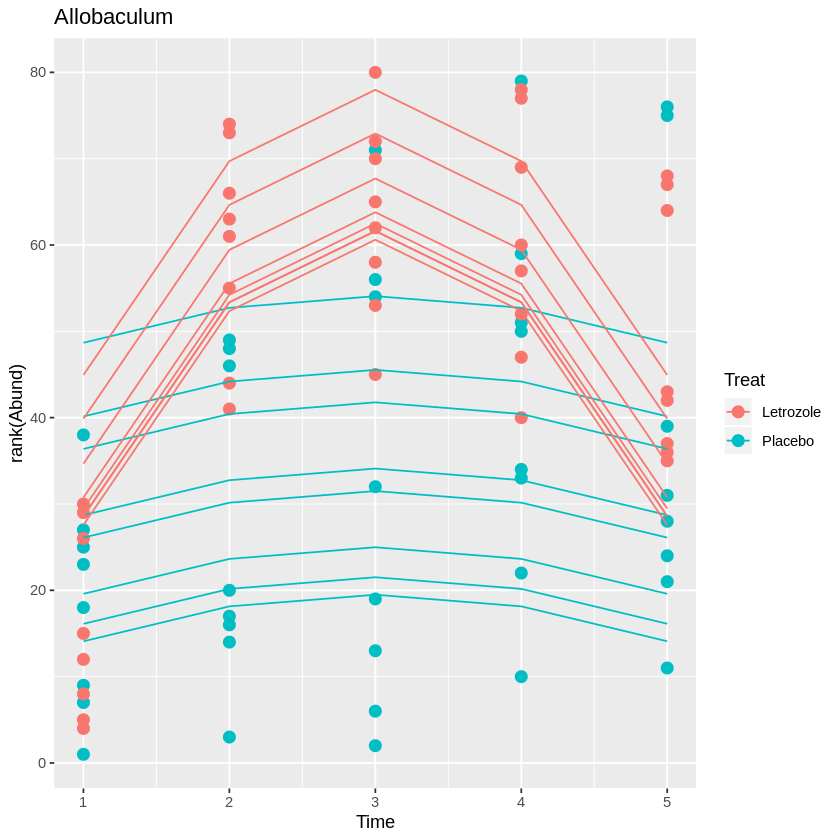

In [17]:
fm_allo <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Allobaculum, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_allo))
    newdat <- expand.grid(Treat=unique(mylist$Allobaculum),
                      Time=c(min(mylist$Allobaculum$Time),
                            max(mylist$Allobaculum$Time)))


    p_allo <- ggplot(mylist$Allobaculum, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Allobaculum") +
          geom_line(aes(y=predict(fm_allo), group=Individual))
    print(p_allo)

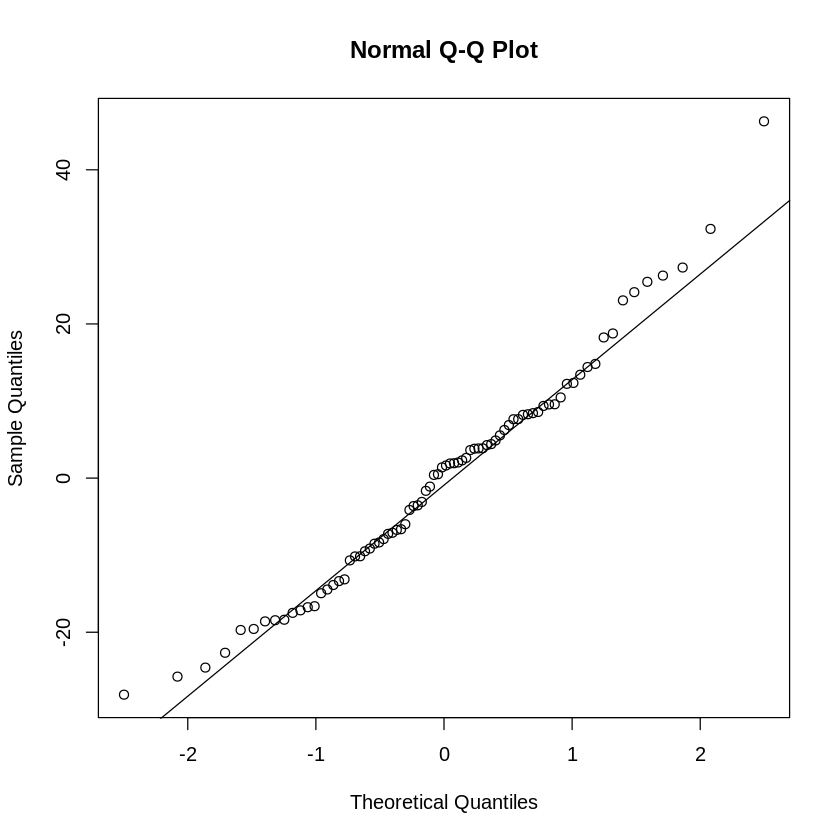

In [18]:
qqnorm(resid(fm_allo))
qqline(resid(fm_allo))

## Ruminococcus

Linear mixed-effects model fit by REML
 Data: mylist$Ruminococcus 
       AIC      BIC    logLik
  718.5454 737.1912 -351.2727

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.94103 (Intr)
1 | I((Time - 3)^2)TRUE 17.94401 -0.798
Residual                20.17709       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF  t-value p-value
(Intercept)                  32.83929  6.400872 62 5.130440  0.0000
I((Time - 3)^2)               1.26786  1.906556 62 0.664999  0.5085
TreatPlacebo                  9.32143  9.052200 14 1.029742  0.3206
I((Time - 3)^2):TreatPlacebo  0.46429  2.696277 62 0.172195  0.8638
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.596                   
TreatPlacebo                 -0.707  0.421            
I((Time -

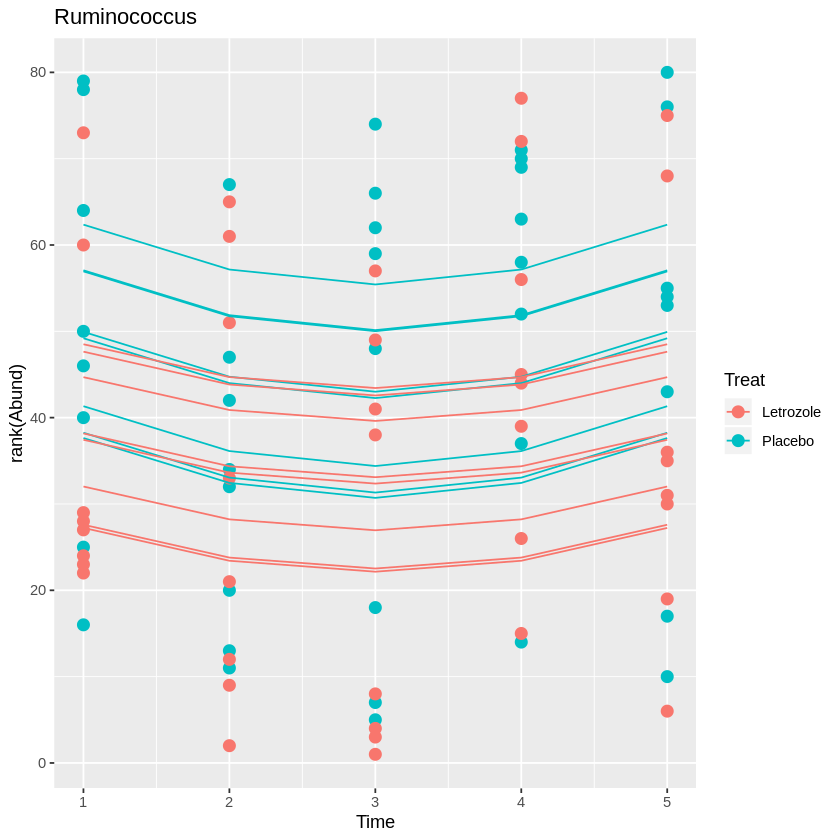

In [20]:
fm_rumino <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Ruminococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_rumino))
    newdat <- expand.grid(Treat=unique(mylist$Ruminococcus),
                      Time=c(min(mylist$Ruminococcus$Time),
                            max(mylist$Ruminococcus$Time)))


    p_rumino <- ggplot(mylist$Ruminococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Ruminococcus") +
          geom_line(aes(y=predict(fm_rumino), group=Individual))
    print(p_rumino)

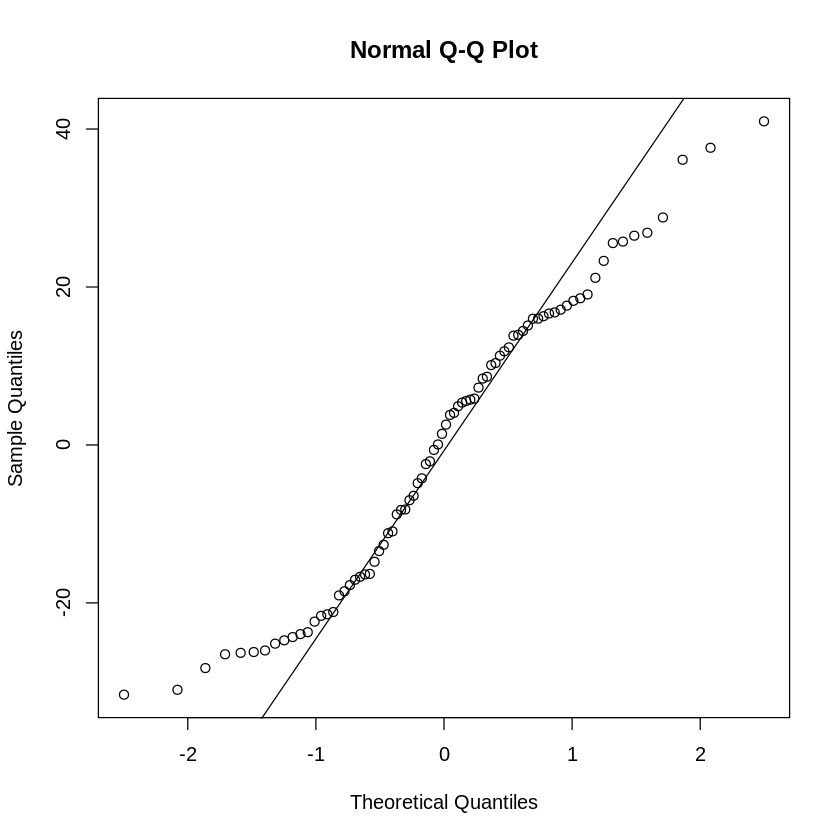

In [21]:
qqnorm(resid(fm_rumino))
qqline(resid(fm_rumino))

## S24-7

Linear mixed-effects model fit by REML
 Data: mylist$`S24-7` 
       AIC      BIC    logLik
  717.8935 736.5394 -350.9468

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             16.74430 (Intr)
1 | I((Time - 3)^2)TRUE 17.81797 -0.924
Residual                21.10519       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  47.59286  5.731327 62  8.303986  0.0000
I((Time - 3)^2)              -0.00893  1.994253 62 -0.004477  0.9964
TreatPlacebo                 -6.72143  8.105320 14 -0.829261  0.4209
I((Time - 3)^2):TreatPlacebo -3.71429  2.820300 62 -1.316983  0.1927
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.696                   
TreatPlacebo                 -0.707  0.492            
I((Time -

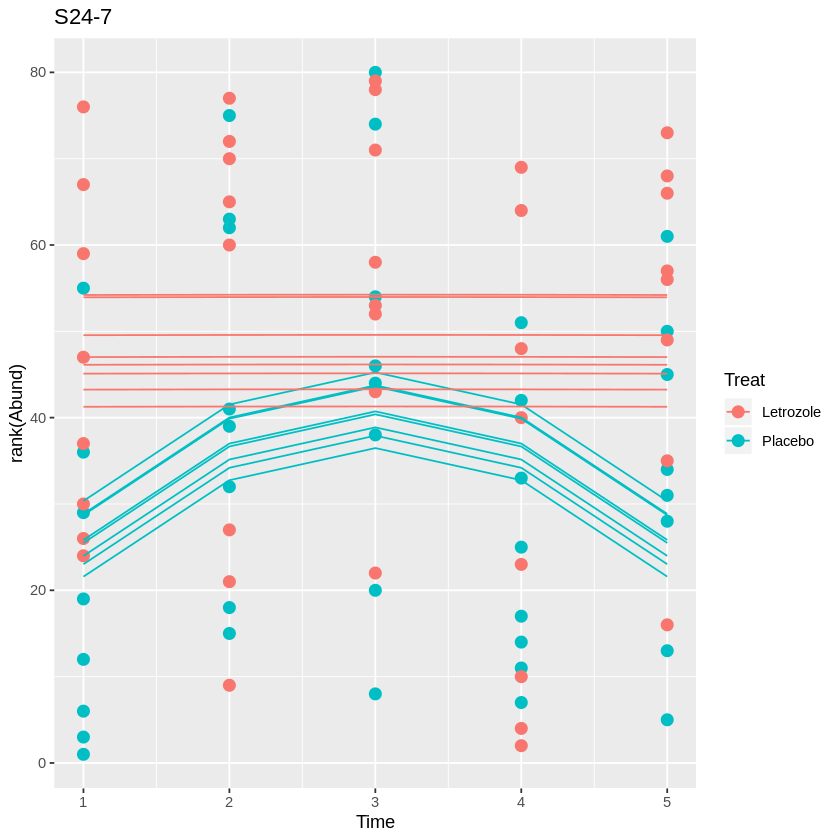

In [23]:
fm_s24 <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$`S24-7`, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_s24))
    newdat <- expand.grid(Treat=unique(mylist$`S24-7`),
                      Time=c(min(mylist$`S24-7`$Time),
                            max(mylist$`S24-7`$Time)))


    p_s24 <- ggplot(mylist$`S24-7`, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("S24-7") +
          geom_line(aes(y=predict(fm_s24), group=Individual))
    print(p_s24)

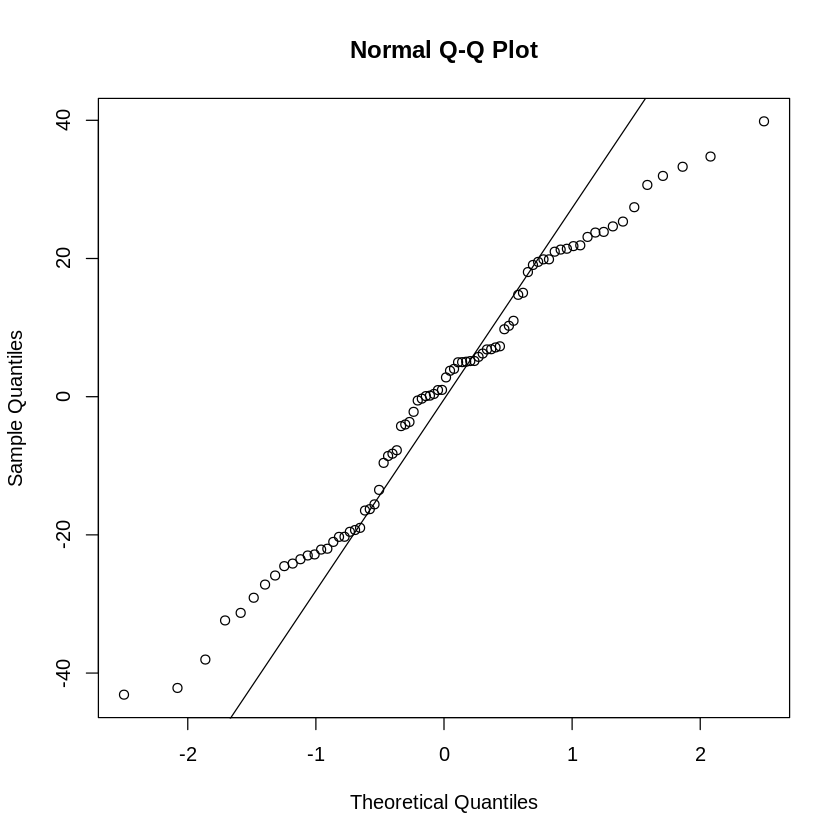

In [24]:
qqnorm(resid(fm_s24))
qqline(resid(fm_s24))

## Lachinospiraceae

Linear mixed-effects model fit by REML
 Data: mylist$Lachinospiraceae 
       AIC      BIC    logLik
  723.0086 741.6544 -353.5043

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             18.26874 (Intr)
1 | I((Time - 3)^2)TRUE 18.62484 -0.901
Residual                21.57325       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF  t-value p-value
(Intercept)                  33.11071  6.059888 62 5.463915  0.0000
I((Time - 3)^2)               1.98214  2.038481 62 0.972363  0.3346
TreatPlacebo                  4.35000  8.569976 14 0.507586  0.6196
I((Time - 3)^2):TreatPlacebo  1.25000  2.882847 62 0.433599  0.6661
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.673                   
TreatPlacebo                 -0.707  0.476            
I((Ti

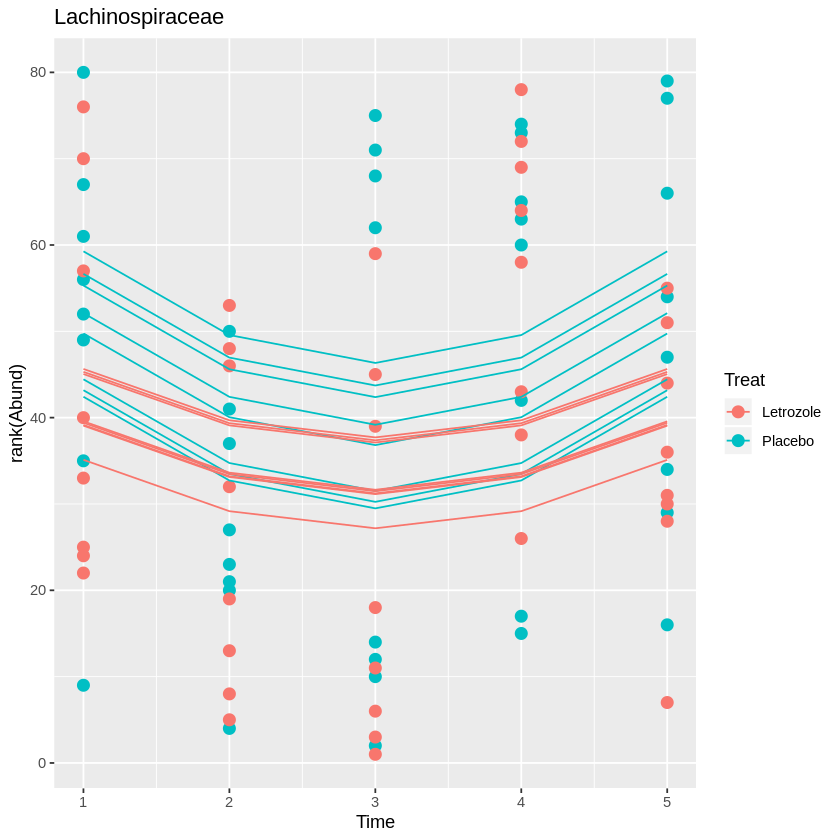

In [26]:
fm_lach <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lachinospiraceae, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_lach))
    newdat <- expand.grid(Treat=unique(mylist$Lachinospiraceae),
                      Time=c(min(mylist$Lachinospiraceae$Time),
                            max(mylist$Lachinospiraceae$Time)))


    p_lach <- ggplot(mylist$Lachinospiraceae, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lachinospiraceae") +
          geom_line(aes(y=predict(fm_lach), group=Individual))
    print(p_lach)

## Bacteroides

Linear mixed-effects model fit by REML
 Data: mylist$Bacteroides 
       AIC      BIC    logLik
  706.8068 725.4526 -345.4034

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             16.82065 (Intr)
1 | I((Time - 3)^2)TRUE 16.82065 -0.541
Residual                17.50983       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   43.33929  7.146357 62  6.064528  0.0000
I((Time - 3)^2)               -0.73214  1.654524 62 -0.442510  0.6597
TreatPlacebo                 -10.10714 10.106475 14 -1.000066  0.3343
I((Time - 3)^2):TreatPlacebo   3.67857  2.339850 62  1.572140  0.1210
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.463                   
TreatPlacebo                 -0.707  0.327            


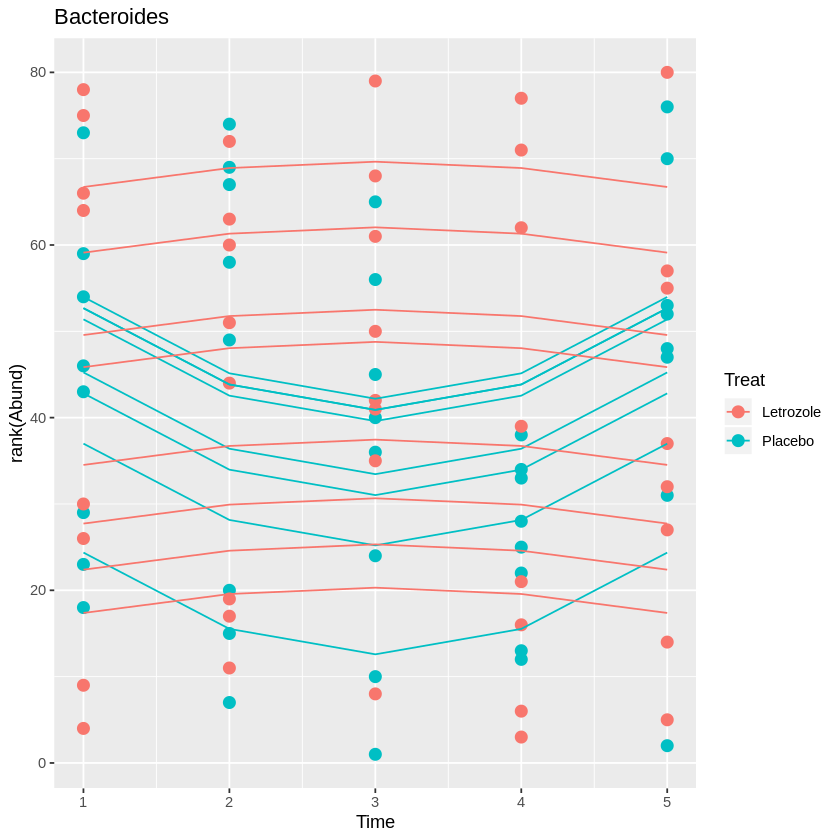

In [27]:
fm_bact <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Bacteroides, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_bact))
    newdat <- expand.grid(Treat=unique(mylist$Bacteroides),
                      Time=c(min(mylist$Bacteroides$Time),
                            max(mylist$Bacteroides$Time)))


    p_bact <- ggplot(mylist$Bacteroides, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Bacteroides") +
          geom_line(aes(y=predict(fm_bact), group=Individual))
    print(p_bact)

## Oscillospira

Linear mixed-effects model fit by REML
 Data: mylist$Oscillospira 
       AIC      BIC    logLik
  712.5012 731.1471 -348.2506

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.23260 (Intr)
1 | I((Time - 3)^2)TRUE 17.23317 -0.766
Residual                19.20551       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                  26.146429  6.304539 62  4.147239  0.0001
I((Time - 3)^2)               4.901786  1.814751 62  2.701080  0.0089
TreatPlacebo                 14.421429  8.915964 14  1.617484  0.1281
I((Time - 3)^2):TreatPlacebo -2.660714  2.566445 62 -1.036732  0.3039
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.576                   
TreatPlacebo                 -0.707  0.407            

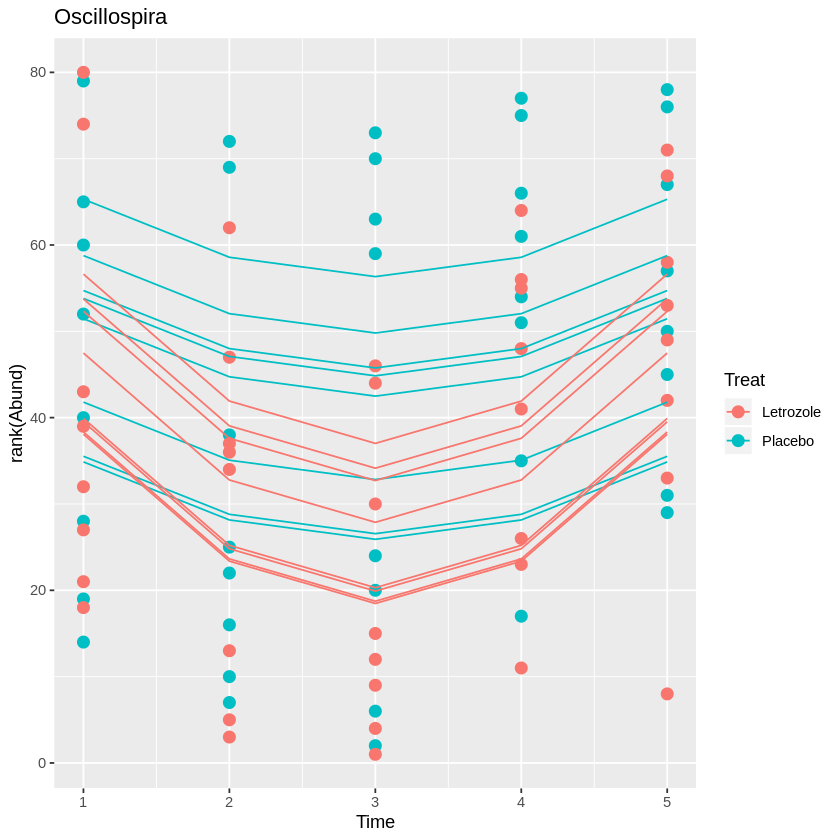

In [32]:
fm_oscil <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Oscillospira, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_oscil))
    newdat <- expand.grid(Treat=unique(mylist$Oscillospira),
                      Time=c(min(mylist$Oscillospira$Time),
                            max(mylist$Oscillospira$Time)))


    p_oscil <- ggplot(mylist$Oscillospira, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Oscillospira") +
          geom_line(aes(y=predict(fm_oscil), group=Individual))
    print(p_oscil)

## CF231

Linear mixed-effects model fit by REML
 Data: mylist$CF231 
       AIC      BIC    logLik
  674.8143 693.4601 -329.4071

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             14.40775 (Intr)
1 | I((Time - 3)^2)TRUE 14.40775 -0.223
Residual                13.36116       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   54.35000  7.152368 62  7.598882  0.0000
I((Time - 3)^2)               -2.93750  1.262511 62 -2.326712  0.0233
TreatPlacebo                 -17.77143 10.114975 14 -1.756942  0.1008
I((Time - 3)^2):TreatPlacebo   0.91071  1.785461 62  0.510072  0.6118
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.353                   
TreatPlacebo                 -0.707  0.250            
I((Tim

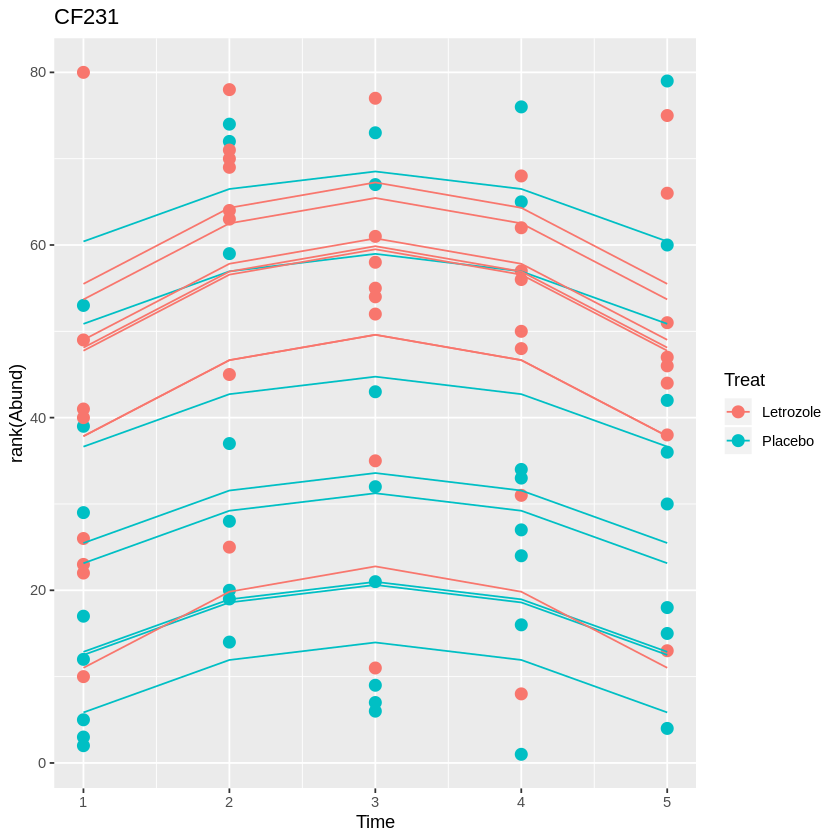

In [33]:
fm_cf <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$CF231, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_cf))
    newdat <- expand.grid(Treat=unique(mylist$CF231),
                      Time=c(min(mylist$CF231$Time),
                            max(mylist$CF231$Time)))


    p_cf <- ggplot(mylist$CF231, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("CF231") +
          geom_line(aes(y=predict(fm_cf), group=Individual))
    print(p_cf)

In [34]:
# Here is a plot of the bacteria that showed siginificance over time or treatment
pdf("LME_pablo_new_significant.pdf",width = 15, height = 15)
grid.arrange(p_allo, p_bifido,p_oscil,p_cf, ncol = 2, nrow = 2)
dev.off()

png 
  2

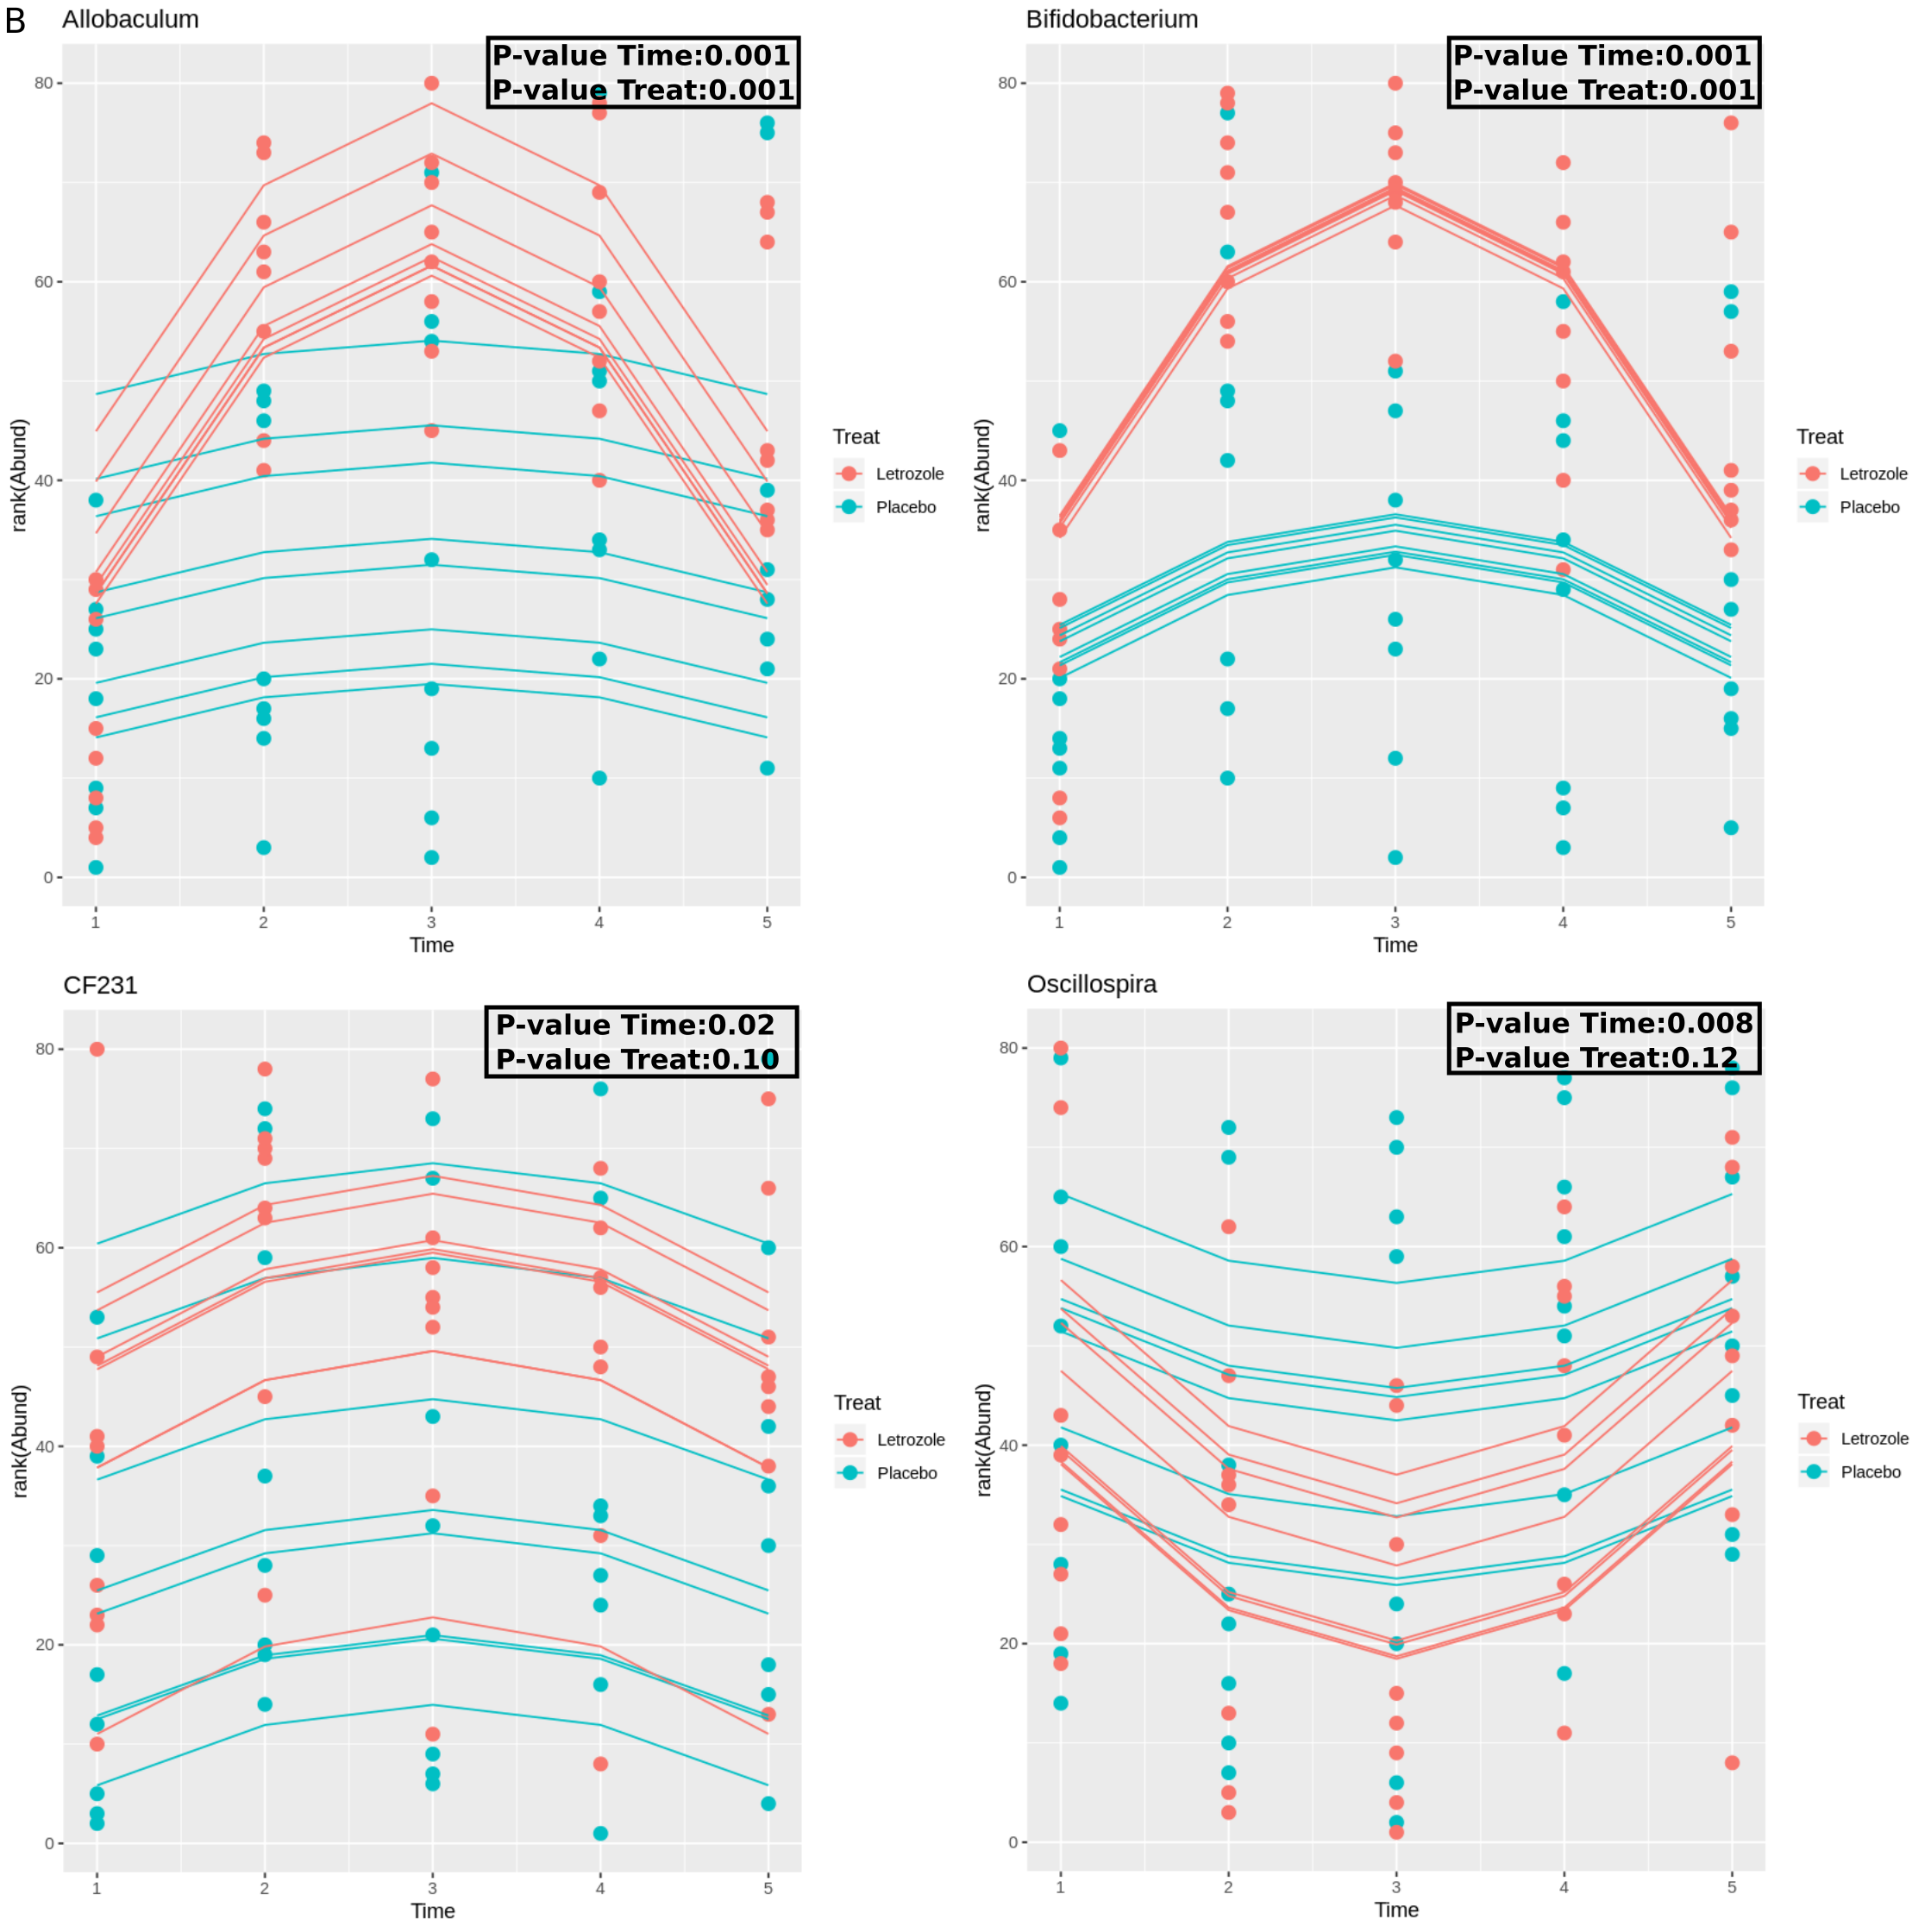